In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read dataset

In [2]:
HD_df = pd.read_csv('kc_house_data.csv')

### Exploratory Data Anlaysis

In [3]:
# Eyeball the dataset 
HD_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Provides information of datatypes in teh dataframe and gives information about count of non-null values of each column.
HD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
#Observation - The dataset is clean and contains no rows with null values.

In [6]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of the dataset’s distribution.
HD_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


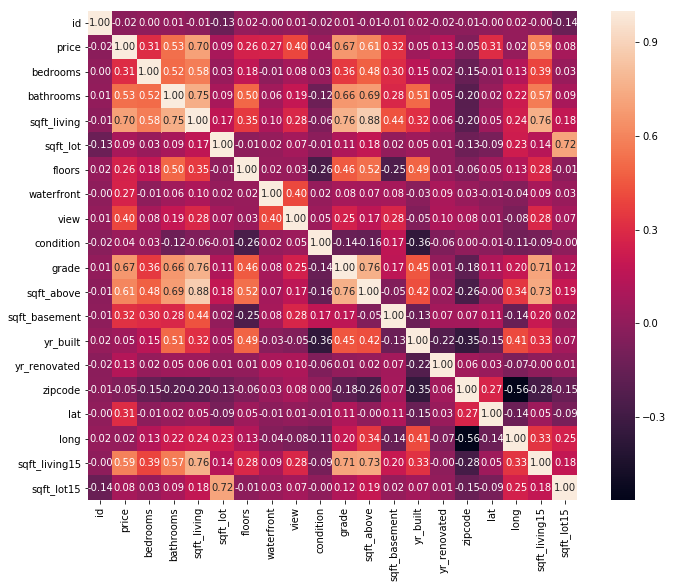

In [7]:
#correlation matrix
corrmat = HD_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [8]:
# Check distribution of various independent features and target variable (Price)

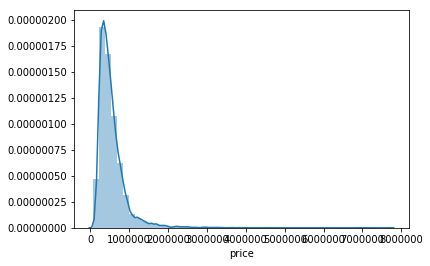

In [8]:
sns.distplot(HD_df['price'],bins=50)

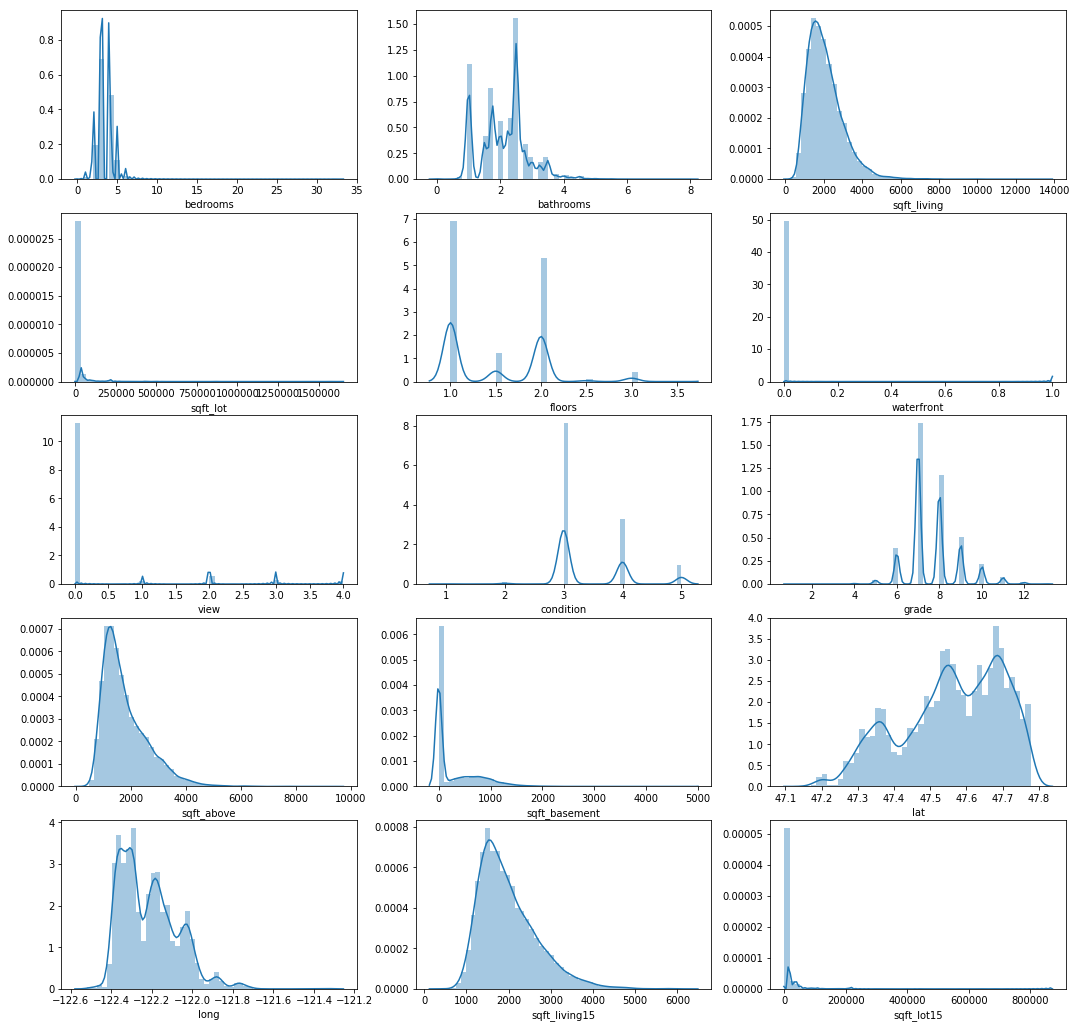

In [9]:
tempdf = HD_df.drop(['id','price','date','zipcode','yr_built','yr_renovated'],axis=1)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(18, 18))
for i, column in enumerate(tempdf.columns):
    sns.distplot(tempdf[column],ax=axes[i//3,i%3])

### Insights

In [11]:
# Below are the observations based on Correlation heatmap and distribution plot. 
# The features square foot living area, grade, square feet above the ground level and sqft_15 features have 
# high correlation wih the price of the house.
# There is a high correlation of sqft_living with number of bathrooms, grade, sqft_living15.
# The data is right-skewed (for ex: for 'bedrooms', 'bathrooms','sqft_living') indicating extreme values 
# and possibly even outliers. 

In [12]:
# Let us explore features individually for outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0xdb12400>,
 'caps': [<matplotlib.lines.Line2D at 0xd306278>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb123c8>],
 'medians': [<matplotlib.lines.Line2D at 0xdda7c18>],
 'fliers': [<matplotlib.lines.Line2D at 0xdda7860>],
 'means': []}

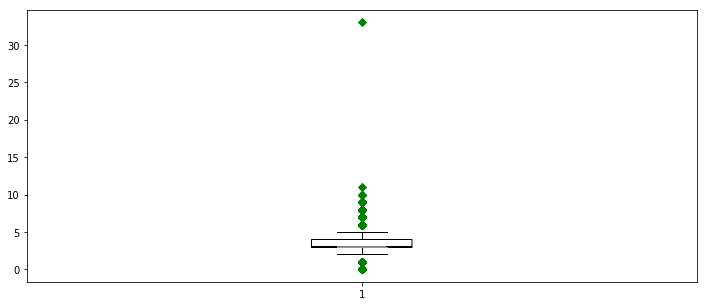

In [10]:
# Checking for outliers for feature 'bedrooms'
plt.figure(figsize=(12,5))
plt.boxplot(HD_df['bedrooms'],1,'gD')

In [14]:
# Clearly there seems to be one outlier with 'bedrooms' greater than 30 , Maybe it is some castle :-)
# Let's find the record and later remove from dataframe to minimize its impact on the model.

In [11]:
HD_df[HD_df['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
# Removing the one outlier that has 33 bedrooms
HD_df = HD_df[HD_df['bedrooms']<31]

{'whiskers': [<matplotlib.lines.Line2D at 0xe74aa58>,
 'caps': [<matplotlib.lines.Line2D at 0xe74ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0xe74a668>],
 'medians': [<matplotlib.lines.Line2D at 0xe683780>],
 'fliers': [<matplotlib.lines.Line2D at 0xe683ac8>],
 'means': []}

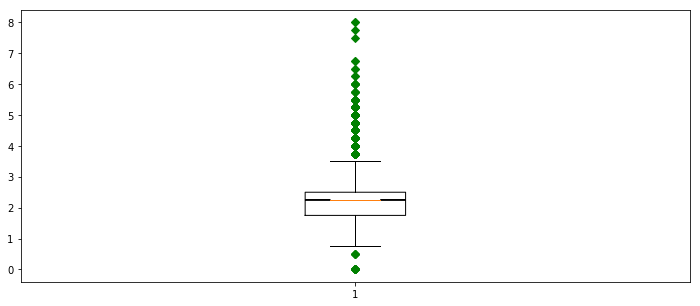

In [13]:
# Explore for outliers using the feature 'bathrooms'
plt.figure(figsize=(12,5))
plt.boxplot(HD_df['bathrooms'],1,'gD')

In [14]:
HD_df[HD_df['bathrooms']>7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [15]:
# Removing the four outliers from 21,612 records
HD_df = HD_df[HD_df['bathrooms']<7.01]

In [16]:
HD_df.shape

(21608, 21)

{'whiskers': [<matplotlib.lines.Line2D at 0xe19bf60>,
 'caps': [<matplotlib.lines.Line2D at 0xe1a5630>,
 'boxes': [<matplotlib.lines.Line2D at 0xe19bb70>],
 'medians': [<matplotlib.lines.Line2D at 0xe1a5cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe1a5da0>],
 'means': []}

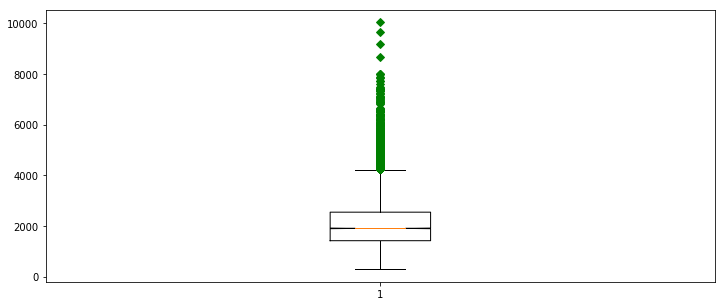

In [17]:
# Explore for outliers using the feature 'sqft_living'
plt.figure(figsize=(12,5))
plt.boxplot(HD_df['sqft_living'],1,'gD')

In [22]:
df[df['sqft_living']>8500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


In [18]:
HD_df = HD_df[HD_df['sqft_living']<8501]

In [19]:
HD_df.shape

(21604, 21)

In [20]:
# Include the variables that have correlation on target variable (price)
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long','sqft_living15', 'sqft_lot15']
X = HD_df[cols]
y = HD_df['price']

### Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Convert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = 1)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    ytrain_predicted = model.predict(x_train)
    mse = metrics.mean_squared_error(ytrain_predicted, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    ytest_predicted = model.predict(x_test)
    mse = metrics.mean_squared_error(ytest_predicted, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

In [29]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [30]:
linRegcheckModelPerformance(X, y)

,trainData,testData
dataSize,15122.0000,6482.0000
rmse,216434.5425,220603.9114
rmsePct,40.1263,41.1116
r2,0.6238,0.6267
adjR2,0.6235,0.6260


In [31]:
acc=lm.score(X_test,y_test)
print('Accuracy using Linear Regression Model = ',acc)

Accuracy using Linear Regression Model =  0.6267004153841266


### Determinig Best Features

In [32]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built',
            'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']


target = HD_df['price']
feature_matrix = HD_df[features]

my_linear = LinearRegression()
my_linear.fit(feature_matrix, target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=3)
my_linear.fit(X_train, y_train)
#Print accuracy for Linear model using best features
acc_features=my_linear.score(X_test,y_test)
print('Accuracy using all features for Linear Regression Model = ',acc_features)

Accuracy using all features for Linear Regression Model =  0.7085068220754187


In [34]:
coef_list = my_linear.coef_
feature_dict = dict(zip(features, coef_list))

import operator
sorted_d = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in descending order by value : ',sorted_d)

Dictionary in descending order by value :  [('lat', 592854.3614776005), ('waterfront', 505942.5794753028), ('grade', 99964.23609749778), ('view', 52175.513890436036), ('bathrooms', 41272.132558743986), ('condition', 25968.29290614301), ('floors', 8778.952998356584), ('sqft_living', 101.77609874796245), ('sqft_above', 63.764594206493136), ('sqft_basement', 38.01150452411848), ('sqft_living15', 31.383012886260932), ('yr_renovated', 19.764087900370225), ('sqft_lot', 0.14652933243783844), ('sqft_lot15', -0.40241417904930094), ('zipcode', -561.3345204728939), ('yr_built', -2686.5565642631445), ('bedrooms', -36042.60887282339), ('long', -198617.81428107698)]


In [35]:
sorted_features = ['lat','waterfront','grade','view','sqft_living','sqft_above']
best_feature_matrix = df[sorted_features]
X_train, X_test, y_train, y_test = train_test_split(best_feature_matrix, target, test_size=0.3, random_state=3)
my_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#Print accuracy for Linear model using best features
acc_best_features=my_linear.score(X_test,y_test)
print('Accuracy using best features Linear Regression Model = ',acc_best_features)

Accuracy using best features Linear Regression Model =  0.667407800383415


### Cross Validation

In [37]:
from sklearn.model_selection import KFold
LR=LinearRegression(normalize=True)
Ridge_R=Ridge(alpha=1.0,normalize=True)
Lasso_R=Lasso(alpha=1.0,normalize=True)
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([LR,Ridge_R,Lasso_R],['LR','Ridge','Lasso']):
    rmse=[]
    for train,test in kf.split(best_feature_matrix,target):
        Xtrain,Xtest=best_feature_matrix.iloc[train,:],best_feature_matrix.iloc[test,:]
        Ytrain,Ytest=target.iloc[train],target.iloc[test]
        model.fit(Xtrain,Ytrain)
        acc1=model.score(Xtest,Ytest)
        Y_predict=model.predict(Xtest)
        rmse.append(np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
    #print(rmse)
    print("Accuracy  = %0.02f [%s]" % (acc1,name))  
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name))   

Accuracy  = 0.67 [LR]
Cross_Validated_rmse_score: 208168.943 (+/- 29927226.19665) [LR]
Accuracy  = 0.60 [Ridge]
Cross_Validated_rmse_score: 228128.586 (+/- 37835105.26578) [Ridge]
Accuracy  = 0.67 [Lasso]
Cross_Validated_rmse_score: 208169.553 (+/- 30001398.40425) [Lasso]


In [38]:
# Accuracy using all features is 0.70 and after determining the best features and cross-validation, 
# the accuracy did not decrease much (0.67)